<a href="https://colab.research.google.com/github/pankajgupta14061999/Competitive-Coding/blob/master/Deeplearningcodingbloks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist #mnist is dataset of handwritten digits 

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train.shape  # 60000 images of 28*28

(60000, 28, 28)

In [0]:
y_train.shape  # 60000 output correspon to 60000 images

(60000,)

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
y_test.shape

(10000,)

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_image(img):
  # (784,1)-> (28,28)
  #img = img.reshape(28,28) #reshaping image for safety to 28*28
  plt.imshow(img,cmap="gray") # cmap for giving color to image if we dont give cmap it give random color #imshow function for plotting image

In [0]:
x_train[289]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 148, 168,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 183, 203,   9,   0,   0,   0,   0,
          0,   0],
       [  

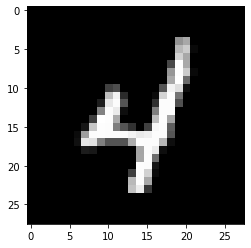

In [0]:
plot_image(x_train[289])

In [0]:
print(y_train[289]) # check no. corr to image

4


In [0]:
# one hot encoding or to_categorical
# it create a matrix of m*n where m in no of input and n is no of unique input. value corresponding to m is set as 1 and other as 0 like
# input are 2,2,3,4
#        2   3     4
# 2      1   0      0
# 2      1   0      0
#  3     0   1      0
# 4      0   0      1

# so i our case it is matrix of 60000*10 or 10000*10

In [0]:
from keras.utils import to_categorical  # to_categorical is a function
y_train=to_categorical(y_train)
y_test= to_categorical(y_test)

In [0]:
y_train.shape

(60000, 10)

In [0]:
y_test.shape

(10000, 10)

In [0]:
# neuron in each output layer give probability of that no to which it is corresponding and final ans is which one having highest probablity

## Artificial Neural Network

In [0]:
from keras.models import Sequential #sequential model in which getting input in one layer and giving output to another layer sequential manner
from keras.layers import Dense #dense layer mean connecting to all neurons

In [0]:
x_train=x_train.reshape(60000,784)   #matrix to vector bcoz neuron accept data in vector form not in matrix
x_test=x_test.reshape(10000,784)

In [0]:
x_train.shape

(60000, 784)

In [0]:
x_test.shape

(10000, 784)

In [0]:
model = Sequential()  #craete empty architecture
# relu(z)=max(0,z) non linear activation func

model.add(Dense(units=32,activation = 'relu', input_shape=(784,))) #input layer,unitsare no of neuron in layer
# x_train (60000,28,28) but neurol dont support thus so conver to (60000,784)     28*28=784 bcoz neuron accept in vector format not matrix form data
model.add(Dense(units = 64, activation= 'relu')) # no need to give input shape bcoz it is not input layer
model.add(Dense(units=128,activation = 'relu'))
model.add(Dense(units=32,activation = 'relu'))

model.add(Dense(units=10,activation='softmax')) #output layer unis=10 because need to predict no's 0-9 total 10 digits, softmax or sigmoid is used in output layer and 
# relu in input or hidden layers, units can be changed as per your choice
# sigmoid is used when only 0/1 classifier and if there are multi then use softmax as acivator func
# final layer neurons= unique output in data which is 10 in this case

In [0]:
# model has been created

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 40,010
Trainable params: 40,010
Non-trainable params: 0
_________________________________________________________________


In [0]:
# train our model

In [0]:
# complie or model first
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
# adam is a piece of code or algo that optimize  our loss function
# categorical_crossentropy is loss function used only for classification which can be binary or multiclass classification , for binary we write binary_crossentropy
# and categorical_crossentropy for multiclass classification
# metrics is accuracy bcoz we want to measure accuracy

In [0]:
model.fit(x=x_train,y=y_train,epochs=10,validation_data=(x_test,y_test))  # epochs is no of iterations

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.8397 - accuracy: 0.7951 - val_loss: 0.3770 - val_accuracy: 0.8920
Epoch 2/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.2974 - accuracy: 0.9154 - val_loss: 0.2573 - val_accuracy: 0.9277
Epoch 3/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.2321 - accuracy: 0.9341 - val_loss: 0.2050 - val_accuracy: 0.9426
Epoch 4/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.1960 - accuracy: 0.9444 - val_loss: 0.1856 - val_accuracy: 0.9448
Epoch 5/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.1722 - accuracy: 0.9503 - val_loss: 0.1828 - val_accuracy: 0.9475
Epoch 6/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.1565 - accuracy: 0.9559 - val_loss: 0.1741 - val_accuracy: 0.9510
Epoch 7/10
60000/60000 [==============================] - 3s 51us/st

In [35]:
x_test[289]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  68, 231, 254, 254,  95,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   7, 113, 210, 251, 253, 224, 105,
        54,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   6, 195, 253, 253, 20

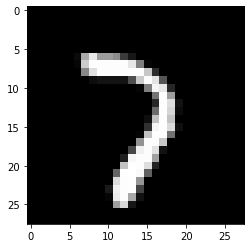

In [40]:
plot_image(x_test[2890])

In [0]:
# if we increase epochs it increase training accuracy only not testing accuracy

In [41]:
model.predict_classes(x_test[2890].reshape(1,784))

array([7])

In [0]:
# prediction is correct

In [0]:
# hyperparameter is no. of units,activation function, no of layers, no of epochs

In [44]:
plot_image(deeplearningtest.png)

NameError: ignored

In [0]:
from PIL import Image

In [111]:
image=Image.open('deeplearningtest.png')
image.size
new_img=image.resize((28,28))
new_img.size

(28, 28)

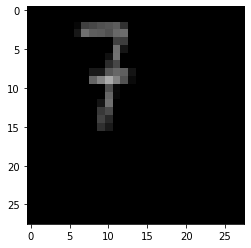

In [112]:
plot_image(new_img)